## Importing modules

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the dataset, observing basics


In [137]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [138]:
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [139]:
# 150 rows, 50 cols
df.shape

(150, 5)

In [140]:
#checks for NaN values in the dataset
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Descriptive Statistics part of EDA

In [141]:
# measures of central tendency

print(df.mean(axis=0, numeric_only=True)) #mean of whole dataset
print(df.median(axis=0, numeric_only=True)) #median of whole dataset

print(df.groupby('species').mean()) #mean of each flower's data
print(df.groupby('species').median()) #median of each flower's daya


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64
sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0


In [142]:
# trimmed means, calculated in the interquartile range
for col in df.columns.drop('species'):
    first = df[col].quantile(0.25)
    third = df[col].quantile(0.75)
    
    trimmedmean = stats.trim_mean(df[col], 0.25)
    print(f'trimmed mean for IQR for column, {col} is: {trimmedmean}')


trimmed mean for IQR for column, sepal_length is: 5.802631578947367
trimmed mean for IQR for column, sepal_width is: 3.032894736842106
trimmed mean for IQR for column, petal_length is: 3.9342105263157894
trimmed mean for IQR for column, petal_width is: 1.230263157894737


In [143]:
#measures of variability:

print(df.var(axis=0, numeric_only=True)) #variance of the whole dataset
print(df.std(numeric_only=True, axis=0)) #standard deviation of whole dataset
print(df.groupby('species').var()) # variance of each flower
print(df.groupby('species').std()) # standard deviation of each flower

#MAD calculation
mad_calc = {}
for col in df.columns.drop('species'):
    mad = (df[col] - df[col].mean()).abs().median()
    mad_calc[col] = round(mad,2)
print(f'\nThe Mean Absolute Deviation of dataset is: {mad_calc}')

#AAD calculation
aad_calc = {}
for col in df.columns.drop('species'):
    aad = (df[col] - df[col].mean()).abs().mean()
    aad_calc[col] = round(aad,2)
print(f'The Absolute Average Deviation of the dataset is: {aad_calc}')

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64
sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.124249     0.143690      0.030159     0.011106
versicolor      0.266433     0.098469      0.220816     0.039106
virginica       0.404343     0.104004      0.304588     0.075433
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.379064      0.173664     0.105386
versicolor      0.516171     0.313798      0.469911     0.197753
virginica       0.635880     0.322497      0.551895     0.274650

The Mean Absolute Deviation of dataset is: {'sepal_length': 0.66, 'sepal_width': 0.26, 'petal_length': 1.79, 'petal_wid

## Data Visualization part of EDA
## Univariate Analysis


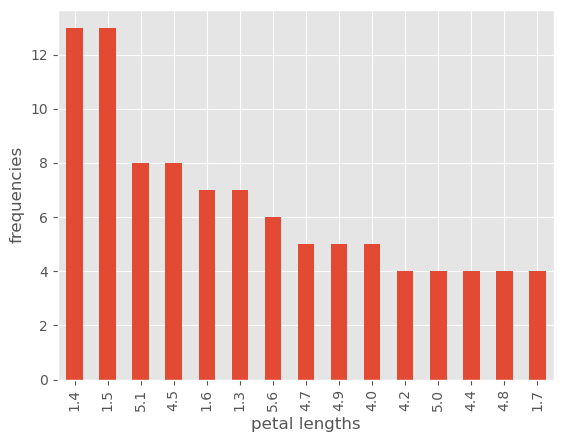

In [156]:
# bar charts
pl = df['petal_length'].value_counts().head(15).plot(kind='bar')
pl.set_xlabel('petal lengths')
pl.set_ylabel('frequencies')
plt.show()

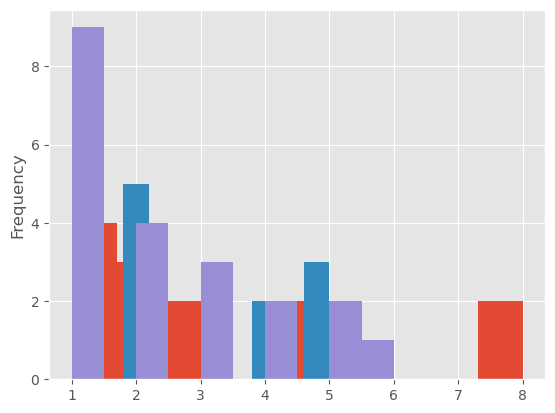

In [171]:
#histograms for different flowers
setosa = df[df['species']=='setosa']
setosa = setosa.drop('species',axis=1)
hist1 = setosa['sepal_length'].value_counts().plot(kind='hist') # setosa in orange
versicolor = df[df['species'] == 'versicolor']
versicolor = versicolor.drop('species',axis=1)
hist2 = versicolor['sepal_length'].value_counts().plot(kind='hist') #versicolor in blue
virginica = df[df['species'] == 'virginica']
virginica = virginica.drop('species',axis=1)
hist3 = virginica['sepal_length'].value_counts().plot(kind='hist') #versicolor in purple
plt.show()

In [ ]:
# box plots
